In [1]:
#Installing dependencies in the Session
!pip install tensorflow matplotlib tensorflow_datasets ipywidgets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 14.9 MB/s eta 0:00:00


In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

In [3]:
ds = tfds.load('fashion_mnist', split='train')

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/incomplete.CM8ARR_3.0.1/fashion_mnist-train.tfrecord*...:   …

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/incomplete.CM8ARR_3.0.1/fashion_mnist-test.tfrecord*...:   0…

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [4]:
import numpy as np

In [5]:
ds.as_numpy_iterator().next()['label']

np.int64(2)

In [6]:
#Data Visualization
dataiterator = ds.as_numpy_iterator()

In [7]:
#Printing Data out of Pipeline
dataiterator.next()['image'].shape

(28, 28, 1)

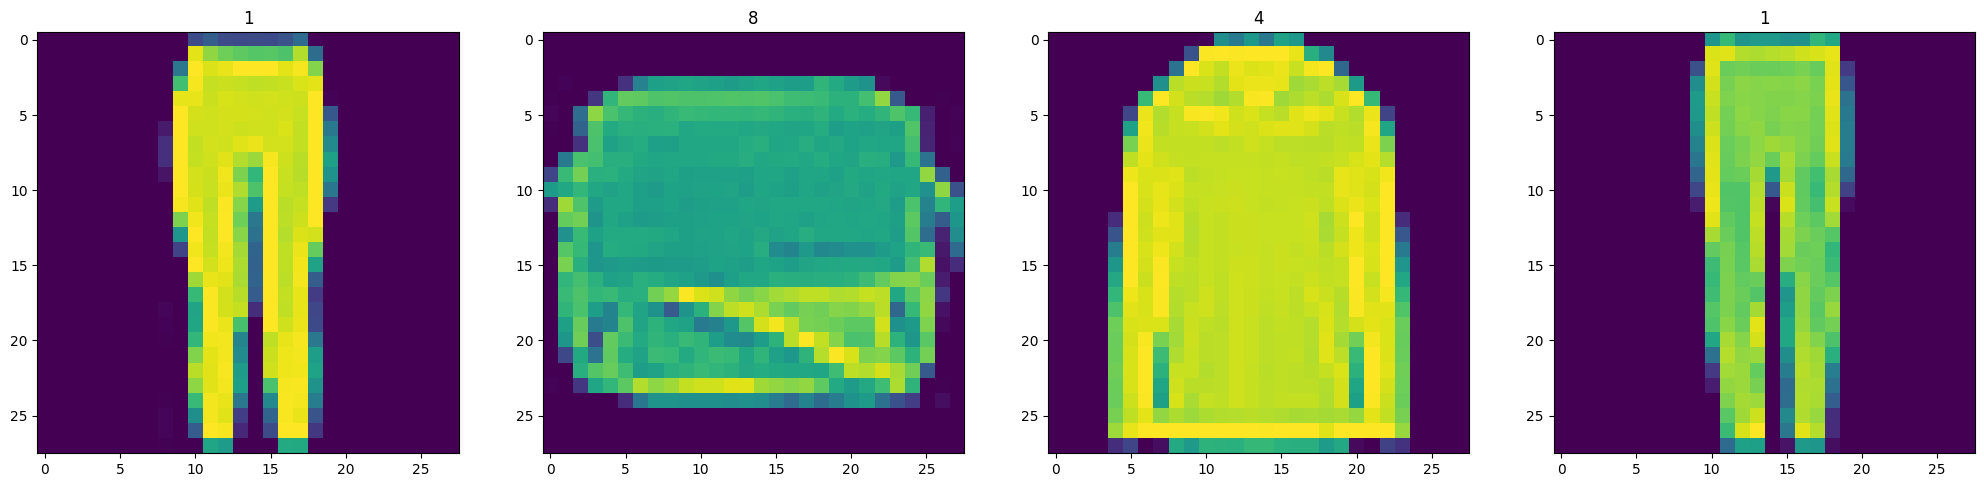

In [8]:
#Subplot Formatting
fig, ax = plt.subplots(ncols=4, figsize=(25, 25))
for idx in range(4):
  #Get an Image and corresponding Label
  batch = dataiterator.next()
  ax[idx].imshow(batch['image'])
  #Appending the image label as the Plot Title
  ax[idx].title.set_text(batch['label'])

In [9]:
#Data Processing: To Make a better deeplearning model, we need to scale
#the range of the inputs from; in this case, 0-255, to 0-1

In [10]:
#Scale and Return Images
def scale_images(example):
    image = tf.cast(example['image'], tf.float32) / 255.0
    label = example['label']
    return {"image": image, "label": label}
ds = ds.map(scale_images)

In [11]:
#Reload data into ds to work on it as it was originally
ds = tfds.load('fashion_mnist', split='train')

In [12]:
#Running the Dataset through the scale_images preprocessing step
ds = ds.map(scale_images)

In [13]:
#Caching the dataset for the batch, to get faster retrievals
ds = ds.cache()

In [14]:
#Shuffle
ds = ds.shuffle(60000)

In [15]:
#Batch Size
ds = ds.batch(128)

In [16]:
#Reduces the Chances of Bottlenecking
ds = ds.prefetch(64)

In [17]:
ds.as_numpy_iterator().next()['image'].shape

(128, 28, 28, 1)

In [18]:
# Neural Network Creation

In [19]:
#Importing Sequential API for Genenrator and Discriminator
from tensorflow.keras.models import Sequential
#Layers imported for NN
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, LeakyReLU, Flatten, Reshape, Dropout, UpSampling2D

In [20]:
#Generator
def build_generator():
  model = Sequential()

  #Random Values taken, and Reshapes
  model.add(Dense(7*7*128, input_dim=128))
  model.add(LeakyReLU(0.2))
  model.add(Reshape((7, 7, 128)))

  #Upsampling Number I
  model.add(UpSampling2D())
  model.add(Conv2D(128, kernel_size=5, padding='same'))
  model.add(LeakyReLU(0.2))

  #Upsampling Number II
  model.add(UpSampling2D())
  model.add(Conv2D(128, kernel_size=5, padding='same'))
  model.add(LeakyReLU(0.2))

  #Convolutional Block Number I
  model.add(Conv2D(128, kernel_size=4, padding='same'))
  model.add(LeakyReLU(0.2))

  #Convolutional Block Number II
  model.add(Conv2D(128, kernel_size=4, padding='same'))
  model.add(LeakyReLU(0.2))

  #Final Convolutional Layer to get One Channel
  #Sigmoid activation function set the Value to be between 0-1
  model.add(Conv2D(1, kernel_size=4, padding='same', activation='sigmoid'))

  return model

In [21]:
generator = build_generator()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
generator.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 6272)                │         809,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d (UpSampling2D)         │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 14, 14, 128)         │         409,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_1 (UpSampling2D)       │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 28, 28, 128)         │         409,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_3 (LeakyReLU)            │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 128)         │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_4 (LeakyReLU)            │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 28, 28, 1)           │           2,049 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,155,137 (8.22 MB)

 Trainable params: 2,155,137 (8.22 MB)

 Non-trainable params: 0 (0.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step


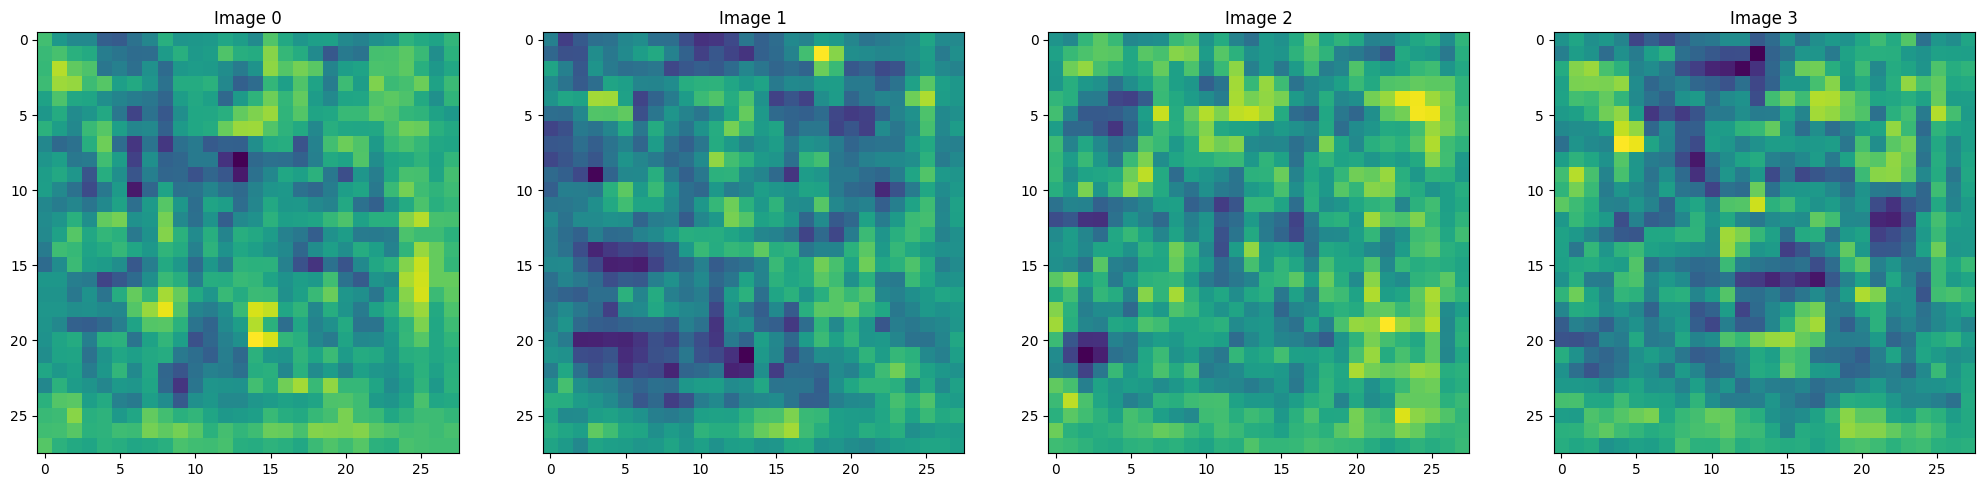

In [23]:
img = generator.predict(np.random.randn(4, 128, 1))

#Subplot Formatting
fig, ax = plt.subplots(ncols=4, figsize=(25, 25))
for idx, img in enumerate(img[:4]):  # iterate over the first 4 images
    ax[idx].imshow(np.squeeze(img))
    ax[idx].set_title(f"Image {idx}")

In [24]:
#Discriminator

In [25]:
def build_discriminator():
  model = Sequential()

  #First Convolutional Block
  model.add(Conv2D(32, kernel_size=5, input_shape=(28, 28, 1))) #Padding not defined to condense the data as it comes
  model.add(LeakyReLU(0.2)) #Activation Layer(input_param)
  model.add(Dropout(0.4)) #Apply Regularization

  #ConvBlock II
  model.add(Conv2D(64, kernel_size=5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  #ConvBlock III
  model.add(Conv2D(128, kernel_size=5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  #ConvBlock III
  model.add(Conv2D(256, kernel_size=5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  #Flatten -> Dense
  model.add(Flatten())
  model.add(Dropout(0.4))
  model.add(Dense(1, activation='sigmoid'))

  return model

In [26]:
discriminator = build_discriminator()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
discriminator.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 24, 24, 32)          │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_5 (LeakyReLU)            │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 20, 20, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_6 (LeakyReLU)            │ (None, 20, 20, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 20, 20, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 16, 16, 128)         │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_7 (LeakyReLU)            │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 12, 12, 256)         │         819,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_8 (LeakyReLU)            │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36864)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 36864)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │          36,865 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,113,345 (4.25 MB)

 Trainable params: 1,113,345 (4.25 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
# Add a batch dimension to the image
img_batch = np.expand_dims(img, axis=0)
discriminator.predict(img_batch)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


array([[0.49443895]], dtype=float32)

In [29]:
#Training Loops

In [30]:
#Adam is an Optimizer
from tensorflow.keras.optimizers import Adam
#This is Loss Function
from tensorflow.keras.losses import BinaryCrossentropy

In [31]:
g_opt = Adam(learning_rate=0.0001)
d_opt = Adam(learning_rate=0.00001)

g_loss = BinaryCrossentropy()
d_loss = BinaryCrossentropy()

In [32]:
#Build Subclassed Model
#Import base model to subclass for training
from tensorflow.keras.models import Model

In [59]:
class FashionGAN(Model):
  def __init__(self, generator, discriminator, *args, **kwargs):
    super().__init__(*args, **kwargs)
    #Create Attributes for Generator and Discriminator
    self.generator = generator
    self.discriminator = discriminator

  def compile(self, g_opt, g_loss, d_opt, d_loss, *args, **kwargs):
    #Compile Baseclass
    super().compile(*args, **kwargs)
    #Attributes for Losses and Optimizers
    self.g_opt = g_opt
    self.d_opt = d_opt
    self.g_loss = g_loss
    self.d_loss = d_loss

  def train_step(self, batch):
    real_images = batch['image']
    fake_images = self.generator(tf.random.normal((128, 128, 1)), training=False)

    #Training the Discriminator
    with tf.GradientTape() as d_tape:
      yhat_real = self.discriminator(real_images, training=True)
      yhat_fake = self.discriminator(fake_images, training=True)
      yhat_realfake = tf.concat([yhat_real, yhat_fake], axis=0)

      #Create Labels for Real and Fake Images
      y_realfake = tf.concat([tf.zeros_like(yhat_real), tf.ones_like(yhat_fake)], axis=0)

      #Adding noise to slow down the discriminator
      noise_real = 0.15*tf.random.uniform(tf.shape(yhat_real))
      noise_fake = -0.15*tf.random.uniform(tf.shape(yhat_fake))
      y_realfake += tf.concat([noise_real, noise_fake], axis=0)

      #Calculate Loss: BinaryCrossEntropy
      total_d_loss = self.d_loss(y_realfake, yhat_realfake)

    #Apply Back Propogation, the real place where a NN learns
    dgrad = d_tape.gradient(total_d_loss, self.discriminator.trainable_variables)
    self.d_opt.apply_gradients(zip(dgrad, self.discriminator.trainable_variables))

    #Training Generator
    with tf.GradientTape() as g_tape:
      #Generate New Images
      gen_images = self.generator(tf.random.normal((128, 128, 1)), training=True)

      #Create Predicted Lables
      predicted_labels = self.discriminator(gen_images, training=True)

      #Calculate Loss: Fake out the Discriminator
      total_g_loss = self.g_loss(tf.zeros_like(predicted_labels), predicted_labels)

    #Apply BackPropogation in Generator
    ggrad = g_tape.gradient(total_g_loss, self.generator.trainable_variables)
    self.g_opt.apply_gradients(zip(ggrad, self.generator.trainable_variables))

    return {"Discrimination Loss": total_d_loss, "Generator Loss": total_g_loss}

In [60]:
#Create Instance of Class
fashionGAN = FashionGAN(generator, discriminator)

In [61]:
#Compile
fashionGAN.compile(g_opt, g_loss, d_opt, d_loss)

In [62]:
import os
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.callbacks import Callback

In [63]:
#Monitoring our Model
class ModelMonitor(Callback):
  def __init__(self, num_img=3, latent_dim=128):
    self.num_img = num_img
    self.latent_dim = latent_dim

  def on_epoch_end(self, epoch, logs=None):
    random_latent_vectors = tf.random.normal(shape=(self.num_img, self.latent_dim))
    generated_images = self.model.generator(random_latent_vectors)
    generated_images *= 255
    generated_images.numpy()
    for i in range(self.num_img):
      img = array_to_img(generated_images[i])
      img.save(os.path.join("generated_img", f'generated_img{i}_{epoch}.png'))

In [65]:
hist = fashionGAN.fit(ds, epochs=2, callbacks=[ModelMonitor()])

Epoch 1/2


InvalidArgumentError: Graph execution error:

Detected at node adam/Sub_7 defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 712, in start

  File "/usr/local/lib/python3.11/dist-packages/tornado/platform/asyncio.py", line 205, in start

  File "/usr/lib/python3.11/asyncio/base_events.py", line 608, in run_forever

  File "/usr/lib/python3.11/asyncio/base_events.py", line 1936, in _run_once

  File "/usr/lib/python3.11/asyncio/events.py", line 84, in _run

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 499, in process_one

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 730, in execute_request

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py", line 383, in do_execute

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/zmqshell.py", line 528, in run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-64-16cb00fcd76b>", line 1, in <cell line: 0>

  File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 371, in fit

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 219, in function

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 132, in multi_step_on_iterator

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 113, in one_step_on_data

  File "<ipython-input-59-bcf18960b22d>", line 40, in train_step

  File "/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py", line 383, in apply_gradients

  File "/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py", line 448, in apply

  File "/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py", line 511, in _backend_apply_gradients

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/optimizer.py", line 120, in _backend_update_step

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/optimizer.py", line 134, in _distributed_tf_update_step

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/optimizer.py", line 131, in apply_grad_to_update_var

  File "/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/adam.py", line 138, in update_step

  File "/usr/local/lib/python3.11/dist-packages/keras/src/ops/numpy.py", line 5982, in subtract

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/sparse.py", line 493, in sparse_wrapper

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/numpy.py", line 370, in subtract

Incompatible shapes: [32] vs. [0]
	 [[{{node adam/Sub_7}}]] [Op:__inference_multi_step_on_iterator_147918]

In [ ]:
plt.suptitle('Loss')
plt.plot(hist.history['d_loss'], label='Discriminator Loss')
plt.plot(hist.history['g_loss'], label='Generator Loss')
plt.legend()